# Scientific Data Analysis Final Project
## Historical Earthquake Data (1986 - 2016) in Canada Analyzed and Reported
**Instructor:** Ken Pu <br>
**Student:** Hassan Tariq <br>
**Date:** December 9, 2018 <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
%matplotlib inline

### Data Initialization

In [2]:
#eqdf = EarthquakeDataFrame
eq_file = 'eqarchive-en.csv'
eqdf = pd.read_csv(eq_file, encoding = "ISO-8859-1")

Peek to check if dataframe has read succesfully.

In [3]:
eqdf.tail(3)

,date,latitude,longitude,depth,magnitude,magnitude type,place
88503,2016-12-31T05:45:19+0000,59.1202,-135.3413,1.0,2.5,ML,"6 km W of Haines,AK"
88504,2016-12-31T06:06:54+0000,59.1265,-135.3472,10.0,1.6,ML,"6 km W of Haines,AK"
88505,2016-12-31T09:07:54+0000,68.4919,-67.3801,18.0,2.9,MN,"175 km NW from Qikiqtarjuaq,NU"


<br>
<br>

In [4]:
eqdf.shape

(88506, 7)

**DATA VOLUME:** The earthquake dataset has 7 columns and 88506 rows.

### Reformatting

To make reading in a tabular form easier, the date and time will be split into their own respective columns. To also compute data easier, we will decrease the table size, including only the years 2006 to 2016, a 10-year range (previously 1985 to 2016). 

**Splitting of date and time:**

In [5]:
eqdf['date'], eqdf['time'] = eqdf['date'].str.split('T', 1).str

In [6]:
eqdf = eqdf[['date',
 'time',
 'latitude',
 'longitude',
 'depth',
 'magnitude',
 'magnitude type',
 'place']]

**Reshaping data to compute easily:**

In [7]:
eqdf[eqdf['date'].str.contains('2006-01-01')]
#39997 and beyond is 2006 - 2016
eqdf = eqdf[39997::]

**Reformatted data:**

**2006**

In [22]:
eqdf.head(3)

,date,time,latitude,longitude,depth,magnitude,magnitude type,place
39997,2006-01-01,02:14:45+0000,57.2885,-132.8815,30.0,2.4,ML,Southeastern Alaska.
39998,2006-01-01,07:16:20+0000,52.3543,-131.7918,20.0,1.2,ML,"99 km S of Sandspit,BC"
39999,2006-01-01,13:54:15+0000,49.4277,-65.7524,18.0,1.3,MN,"55 km N from Murdochville,QC"


**2016**

In [9]:
eqdf.tail(3)

,date,time,latitude,longitude,depth,magnitude,magnitude type,place
88503,2016-12-31,05:45:19+0000,59.1202,-135.3413,1.0,2.5,ML,"6 km W of Haines,AK"
88504,2016-12-31,06:06:54+0000,59.1265,-135.3472,10.0,1.6,ML,"6 km W of Haines,AK"
88505,2016-12-31,09:07:54+0000,68.4919,-67.3801,18.0,2.9,MN,"175 km NW from Qikiqtarjuaq,NU"


**New DATA VOLUME:**

In [10]:
eqdf.shape

(48509, 8)

### Data Quality

This data was recorded by Earthquakes Canada and spans from the year 1985 to 2016. The dataset was retrieved from Canadian Open Data. It is an interesting and relevant dataset due to its ability to understand Canada's seismic activity. Applying data science to this vast earthquake dataset will show that it is an interesting dataset to be analyzed and still relevant in 2018. 

### Features of Data Analysis Applied

**Understanding the data**

Magnitude is a vector (magnitude and direction) quantity used to describe the severity of earthquake shaking. 

Earthquake Magnitude Classes:

<div>
    <table>
        <tr><th>Class</th><th>Magnitude</th></tr>
        <tr><td>Great</td><td>8 or more</td></tr>
        <tr><td>Major</td><td>7 - 7.9</td></tr>
        <tr><td>Strong</td><td>6 - 6.9</td></tr>
        <tr><td>Moderate</td><td>5 - 5.9</td></tr>
        <tr><td>Light</td><td>4 - 4.9</td></tr>
        <tr><td>Minor</td><td>3 - 3.9</td></tr>
        <tr><td>Not felt</td><td> Less than 3 </td></tr>
    </table>
</div>


Depth is a distance reading used to describe how deep below the earth's surface the earthquake occured (in km).

Magnitude types refer to the type of test done in order to determine the magnitude. For our purposes, this data column is irrelevant.

#### 1) Average magnitude

We will create a bar graph of average magnitude by year to see if there is an increase/decrease of the severity of earthquakes. This will be done first to get an overall understanding of the magnitude and its trend over the years.

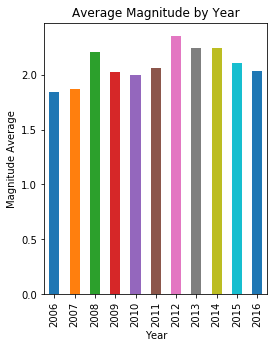

In [11]:
year_mean = []
years = []
for i in range(2006,2017):
    years.append(i)
    year_mean.append((eqdf[eqdf['date'].str.contains(str(i))])['magnitude'].mean())

eqdf_mean = {'Year': years, 'Magnitude mean': year_mean}
eqdf_mean = pd.DataFrame(eqdf_mean).set_index('Year')

plot1 = eqdf_mean['Magnitude mean'].plot(figsize=(4,5), kind='bar', title='Average Magnitude by Year')
plot1.set_ylabel('Magnitude Average');

*Conclusion:*<br> 
There is a very small upward trend in average magnitude as the years go on. The average peaks at 2012 and begins its downturn afterwards. We can expect the magnitude to be similar in our upcoming analyses.

#### 2) Magnitude Classes Analysis

Check the overall magnitude classes occurrences in Canada from 2006-2016 and display using a line graph to visualize the trend.

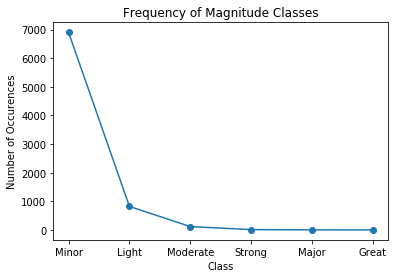

In [12]:
mag_class = [ 'Minor', 'Light', 'Moderate', 'Strong', 'Major', 'Great']
m2 = ['0', 'Minor', 'Light', 'Moderate', 'Strong', 'Major', 'Great']

num_class=[]
for i in range(len(mag_class)-1):
    num_class.append(eqdf[eqdf['magnitude'].between(i+3, i+3.9, inclusive=True)].shape[0])
num_class.append(0)
eqdf_class = {'Class': mag_class, 'Number of Cases': num_class}
    
eqdf_class = pd.DataFrame(eqdf_class).set_index('Class')
plot2 = eqdf_class['Number of Cases'].plot(style='-o', title='Frequency of Magnitude Classes')
plot2.set_xticklabels(m2);
plot2.set_ylabel('Number of Occurences');


*Conclusion:*<br>
There is a very sharp decline in magnitude classes after minor. This would suggest that higher magnitude earthquakes are more unlikely than lower magnitude earthquakes. The turning point being light magnitude class earthquakes.

#### 3) Earthquake Density Analysis

Mapping the latitude and longitude to see where in Canada the densities of earthquakes are. The method will be a scatter plot interpolated over a blank map of Canada. This will allow a visualization of where in Canada the majority of earthquakes occur.

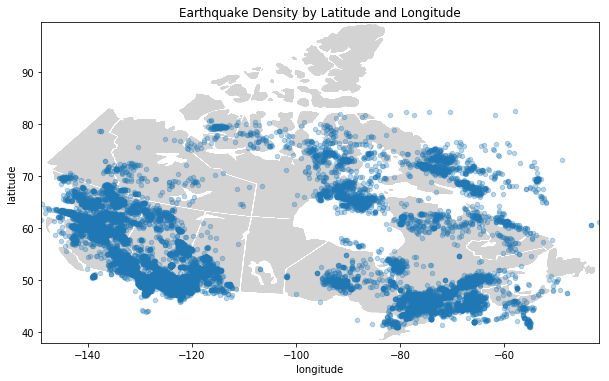

In [13]:
plot3 = eqdf.plot(figsize = (10,10), kind="scatter", x="longitude", y="latitude", alpha = 0.3, title='Earthquake Density by Latitude and Longitude');
limits = [eqdf['longitude'].min(), eqdf['longitude'].max(), eqdf['latitude'].min()-3, eqdf['latitude'].max()+17]
img = pyplot.imread("CanadaMap.png")
plot3.imshow(img, extent=limits);

<img width=300px style="float:left; margin:10px 10px 0 0" src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/14/Political_map_of_Canada.png/500px-Political_map_of_Canada.png"></img>

*Conclusion:*<br>
As seen in the graph above, a large portion of the earthquakes occur in the far west and southeast regions. Through approximation, we can say the majority of earthquakes occur in British Columba, Alberta, Saskatchewan, Ontario, and Quebec. 

#### 4) Depth and Magnitude Correlation
Analyze the correlation between depth and magnitude to see if either impacts the other using a scatter plot and Pearson's correlation coefficient.

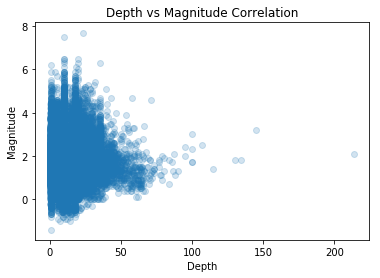

In [14]:
plot4 = pyplot.scatter(eqdf['depth'], eqdf['magnitude'], alpha=0.2)
pyplot.title('Depth vs Magnitude Correlation')
pyplot.xlabel('Depth')
pyplot.ylabel('Magnitude');

Scatter plot does not show any direct correlation between magnitude and depth.

In [15]:
eqdf_dep_mag = eqdf[['depth','magnitude']]
temp = np.corrcoef(eqdf_dep_mag.T)
print("Correlation coefficient is ", temp[1,0])

Correlation coefficient is  -0.16859002933884787


The Pearson's correlation coefficient of -0.17 also indicates no linear correlation between magnitude and depth. 

*Conclusion:*<br>
Neither the scatter plot or correlation coefficient indicates a correlation between depth and magnitude. We can say that neither impacts the other and people in Canada with different surface levels are not in more/less vulnerable areas.

#### 5) Time Analysis of Earthquakes by Year
Analyze the times that earthquakes occur and display in a bar graph.

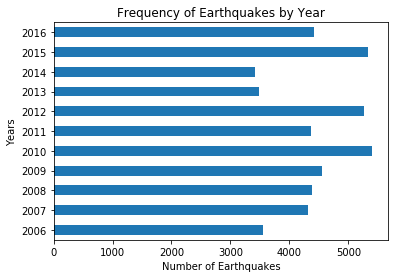

In [16]:
freq_year = []
for i in range(2006,2017):
    freq_year.append((eqdf[eqdf['date'].str.contains(str(i))]).shape[0])
eq_freq_year = {'Years': years, 'Frequency of Earthquakes': freq_year}
eq_freq_year = pd.DataFrame(eq_freq_year).set_index('Years')
plot5 = eq_freq_year.plot(title='Frequency of Earthquakes by Year', kind='barh')
plot5.get_legend().remove()
plot5.set_xlabel('Number of Earthquakes');

*Conclusion:* <br>
There does not seem to be a significant difference just by looking at it.

Further analysis using Pearson's correlation coefficient and a scatter plot with a regression line will be done. 

Correlation coefficient is  0.4693309799523986


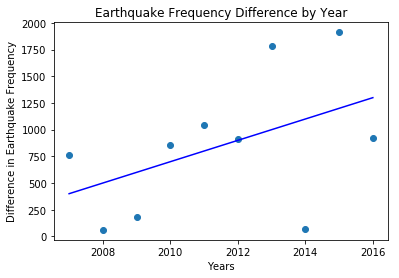

In [17]:
#difference between years
diff_year = np.asarray(freq_year)
years2 = []
#year from 2007-2016
for i in range(2007,2017):
    years2.append(i)
    
t2=np.diff(diff_year)
t2 = t2.tolist()
t2 = [abs(x) for x in t2]
pyplot.scatter(years2, t2)
pyplot.title('Earthquake Frequency Difference by Year')
pyplot.xlabel('Years')
pyplot.ylabel('Difference in Earthquake Frequency')
print("Correlation coefficient is ", np.corrcoef(years2,t2)[0,1])

# Find the slope and intercept of the best fit line
slope, intercept = np.polyfit(years2, t2, 1)
abline_values = [slope * i + intercept for i in years2]
pyplot.plot(years2, abline_values, 'b');

*Conclusion:*<br>
There is a moderate uphill trend of earthquakes occurring by year. Visually, the bar graph shows very similar results and the correlation coefficient of the difference between each year is 0.47 which signifies a moderate positive correlation. We can conclude that earthquake frequency has been increasing moderately between years 2006 and 2016.

#### 7) Magnitude Analysis by Hour

Analyze the magnitude sum by the hour to see if there is a discernable difference. This will allow a visual method to see when the high magnitude/frequent occurrence earthquakes take place.

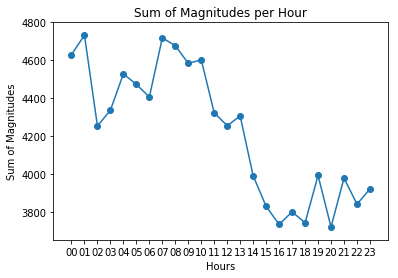

In [18]:
#5 hours behind UTC +0000
sum_by_hour=[]
hour = []
for i in range(00,24):
    hour.append(str(i).zfill(2))
    temp = (eqdf[eqdf['time'].str.match(str(i).zfill(2))])
    sum_by_hour.append(sum(temp['magnitude']))

eq_mag_sum = {'Hours': hour, 'Sum of Magnitudes': sum_by_hour}
eq_mag_sum = pd.DataFrame(eq_mag_sum).set_index('Hours')
plot6 = eq_mag_sum.plot(title='Sum of Magnitudes per Hour')
plot6.set_ylabel('Sum of Magnitudes')
#magnitude total/hour
pyplot.scatter(hour, sum_by_hour)
plot6.get_legend().remove();
plot6.set_xticklabels(hour);

*Conclusion:*<br>
The majority of the earthquakes occur in the earlier hours between 00:00 UTC and 14:00 UTC. This is between 7 pm to 8 am in Canada. For Canadians, this would mean the most vulnerable time for higher magnitude earthquakes is at night. 

#### 8) Earthquake Frequency Analysis by Weekday

Analyze the frequency of earthquakes that take place by weekday and display with a pie chart. Displaying this with a pie chart will allow us to see the percentage of earthquakes that occur on which weekday.


To easily traverse the data, we will transform the date column into its respective weekday (Monday, Tuesday, etc.) and place it in a dictionary.

In [19]:
from datetime import date
import calendar
import datetime
def get_day(dt):
    year, month, day = (int(x) for x in dt.split('-'))    
    ans = datetime.date(year, month, day)
    return calendar.day_name[ans.weekday()]

In [20]:
eqdf['date']
freq_day = []
for index, row in eqdf.iterrows():
    freq_day.append(get_day(row['date']))
    
day_freq = {"Monday": freq_day.count('Monday'),
           "Tuesday": freq_day.count('Tuesday'),
           "Wednesday": freq_day.count('Wednesday'),
           "Thursday": freq_day.count('Thursday'),
           "Friday": freq_day.count('Friday'),
           "Saturday": freq_day.count('Saturday'),
           "Sunday": freq_day.count('Sunday')}
day_freq

{'Monday': 7053,
 'Tuesday': 7041,
 'Wednesday': 7145,
 'Thursday': 7054,
 'Friday': 6935,
 'Saturday': 6487,
 'Sunday': 6794}

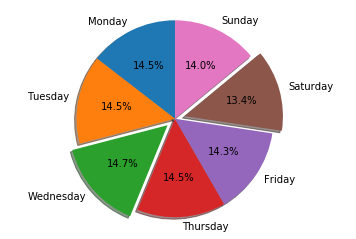

In [21]:
labels = 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
sizes = [day_freq['Monday'], day_freq['Tuesday'], day_freq['Wednesday'],
         day_freq['Thursday'], day_freq['Friday'], day_freq['Saturday'],
        day_freq['Sunday']]
explode = (0, 0, 0.1, 0,0,0.1,0)  #make Saturday pop

fig1, ax1 = pyplot.subplots()
ax1.pie(sizes,  labels=labels, explode=explode,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal');

*Conclusion:*
After visualizing it using a pie chart, it is clear that they are very similar and have an insignificant difference. The highest amount of earthquakes occurred on Wednesday and the least occurred on Saturday. 

### Final Conclusion

As a final conclusion, we can take all our sub conclusions into consideration. 

Magnitude on average floats around *2.0* with very little difference by year and *depth has little to no effect* on the magnitude. The majority of earthquakes are in the *minor classification* (lowest threat level) with the other classifications at a very low frequency. With the frequency in mind, the majority of earthquakes occur in the *far west and southeast of Canada*.

Earthquakes have been *increasing moderately in the past 10 years* with the majority of them occurring between *7 pm and 8 am* in Canada. Weekday-wise, the frequency of earthquakes is very similar. Wednesday has the highest frequency by a small amount and Saturday has the lowest frequency.